In [1]:
import pandas as pd
import warnings
warnings.filterwarnings( 'ignore' )
import os
from matplotlib import pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [ ]:
os.listdir('./data/교통량')

In [63]:
df = pd.DataFrame()
for name in os.listdir('./data/교통량'):
    a = pd.read_csv(f'./data/교통량/{name}',encoding='ANSI')
    df = pd.concat([df,a])

In [82]:
df.reset_index(drop=True,inplace=True)

In [85]:
for i in range(len(df)):
    if '창원' in df.iloc[i]['기초지자체']:
        df.loc[i,'기초지자체'] = '창원시'

In [90]:
df.to_csv('./data/visitor_info.csv',encoding='utf-8',index=False)

In [127]:
r = df.groupby('기초지자체').sum('방문자 수').sort_values('방문자 수',ascending=False)[['방문자 수']][:15]

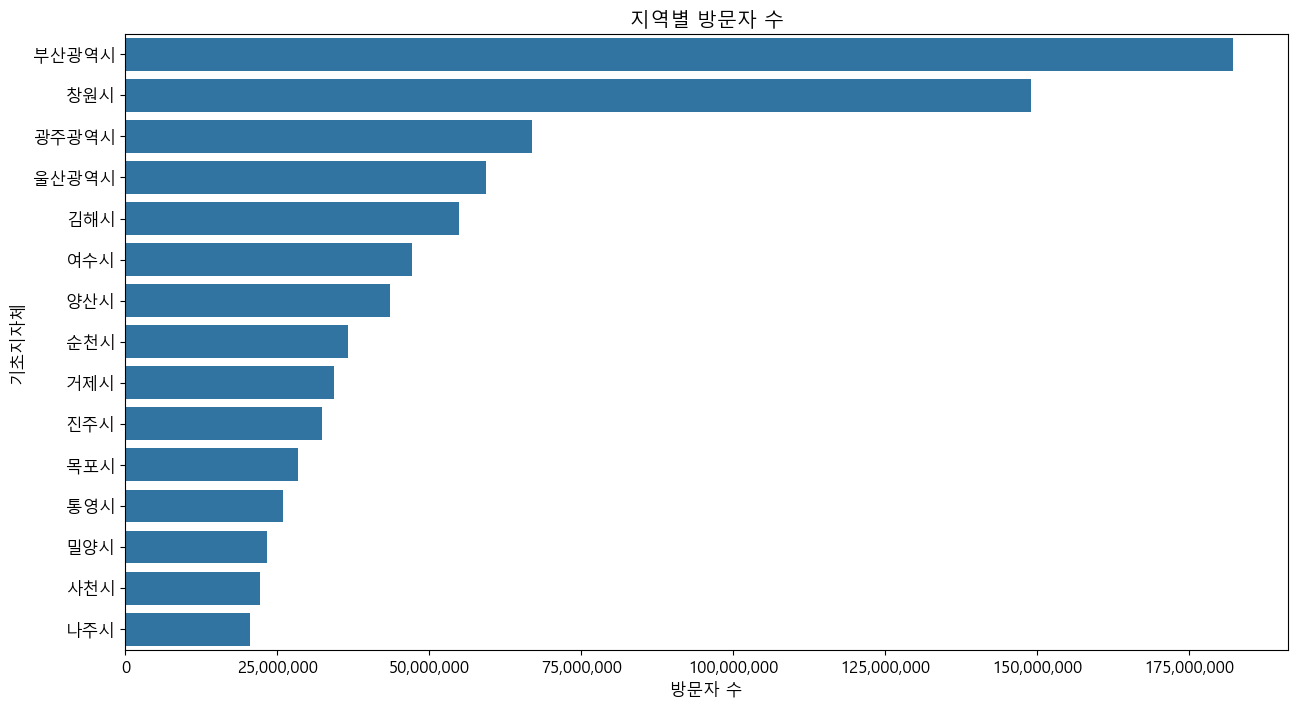

In [139]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.rc('font', family='Malgun Gothic',size=12)

plt.figure(figsize=(15,8))
ax = sns.barplot(
    data = r,
    x = '방문자 수',
    y = r.index
)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
_=plt.title('지역별 방문자 수')

In [142]:
basic_info = pd.read_csv('./부산/basic_info.csv')
navi_info = pd.read_csv('./부산/navi_info.csv')
visit_info = pd.read_csv('./부산/visit_info.csv')
location_info = pd.read_csv('./부산/location_info.csv')

In [159]:
basic_info.drop(['stars','reviews','search_number','catch','description'],axis=1)

,관광지명,주소,평균 체류시간,광역지자체별 거주 방문자 비율
0,명지동근린공원,부산광역시 강서구,164,62.5
1,칠암항,부산광역시 기장군,73,53.6
2,학리항,부산광역시 기장군,88,56.6
3,아미르공원,부산광역시 영도구,154,53.0
4,부산복천동고분군,부산광역시 동래구,183,74.3
...,...,...,...,...
235,광복로문화패션거리,부산광역시 중구,75,69.8
236,송정역,부산광역시 해운대구,84,47.7
237,부산자갈치양곱창골목,부산광역시 중구,67,70.0
238,화전공원,부산광역시 강서구,173,55.1


In [169]:
basic_info.drop(['catch','description'],axis=1).sort_values(by='관광지명').reset_index(drop=True)

,관광지명,주소,평균 체류시간,stars,reviews,search_number,광역지자체별 거주 방문자 비율
0,168계단,부산광역시 동구,184,4.2,1948.0,253000,72.7
1,40계단문화관광테마거리,부산광역시 중구,96,3.8,1705.0,134000,79.1
2,BIFF광장,부산광역시 중구,82,4.1,17771.0,107000,70.9
3,KT&G상상마당부산,부산광역시 부산진구,88,4.5,280.0,293000,63.7
4,SEALIFE부산아쿠아리움,부산광역시 해운대구,59,4.2,8067.0,76200,21.7
...,...,...,...,...,...,...,...
235,화명수목원,부산광역시 북구,68,4.4,1282.0,245000,74.7
236,화전공원,부산광역시 강서구,173,NaN,NaN,176000,55.1
237,황령산,부산광역시 부산진구,121,5.0,5.0,249000,72.4
238,황령산전망대,부산광역시 남구,38,4.6,3512.0,118000,66.1


In [170]:
bus_info = pd.read_csv('./부산/bus_info.csv')

In [176]:
bus_info[:10]

,관광지명,총 승객수,노선,구분,total_time,walking_time,fare,bus_time,subway_time,transfer
0,문화공감수정,42175,29,일반 명소,13,9,1550,4,0,0
1,연동시장,18510,6,숨은 명소,36,11,1550,9,16,1
2,구포어린이교통공원,8867,4,숨은 명소,48,12,1650,0,34,1
3,구덕민속예술관,28469,5,숨은 명소,20,10,1550,10,0,0
4,국제시장,20706,2,일반 명소,17,9,1550,9,0,0
5,만덕고개누리길전망데크,842,1,숨은 명소,78,47,1650,9,22,2
6,광복로문화패션거리,166341,27,일반 명소,19,8,1550,10,0,0
7,대저수문생태공원,96,1,숨은 명소,82,32,1650,6,40,2
8,외양포포진지,460,1,숨은 명소,111,29,2100,38,22,2
9,더베이101,9280,4,일반 명소,52,17,1550,17,18,1


In [2]:
import numpy as np

In [3]:
all_df = pd.read_csv('./data/all_df.csv')

In [17]:
test_df = pd.DataFrame()
test_df['관광지명'] = all_df['관광지명']
test_df['stars'] = all_df['stars']

In [18]:
all_df[all_df['관광지명'].str.contains('만덕고개')][['관광지명','stars','reviews','avg','search_number','광역지자체별 거주 방문자 비율','평균 체류시간']]

,관광지명,stars,reviews,avg,search_number,광역지자체별 거주 방문자 비율,평균 체류시간
5,만덕고개누리길전망데크,4.4,197.0,301.333333,1670,84.0,36


In [42]:
all_df[all_df['관광지명'].str.contains('국제시장')][['관광지명','stars','reviews','avg','search_number','광역지자체별 거주 방문자 비율','평균 체류시간']]

,관광지명,stars,reviews,avg,search_number,광역지자체별 거주 방문자 비율,평균 체류시간
227,국제시장,4.1,12102.0,9192.416667,14600000,61.4,68


In [41]:
b.tail(20)

,관광지명,stars,reviews,search_number,avg,광역지자체별 거주 방문자 비율,평균 체류시간,scores
219,해동용궁사,4.4,1.669586,0.405480,1.526150,0.129702,-1.351068,6.648568
220,40계단문화관광테마거리,3.8,0.777041,0.254566,-0.713849,0.885863,-0.335850,10.640666
221,BIFF광장,4.1,1.598716,0.173770,0.071071,0.779507,-0.609178,9.139045
222,부평시장,4.1,1.603107,1.187349,1.038923,0.727626,-0.687272,7.056668
223,부산박물관,4.3,0.788763,1.795479,0.465814,0.695201,0.816032,8.873409
224,168계단,4.2,0.823732,0.482779,-0.899695,0.802853,1.382211,11.794661
225,이기대,4.5,0.639368,1.689108,-0.006410,0.658885,0.737938,9.777343
226,부산해운대시장,4.1,0.935143,1.308170,0.475788,0.212711,-0.882506,7.569718
227,국제시장,4.1,1.464017,1.938989,1.303044,0.656291,-0.882506,6.017820
228,부산올림픽공원,4.1,0.195680,1.339532,-0.770530,0.568093,-0.862983,9.998766


In [19]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

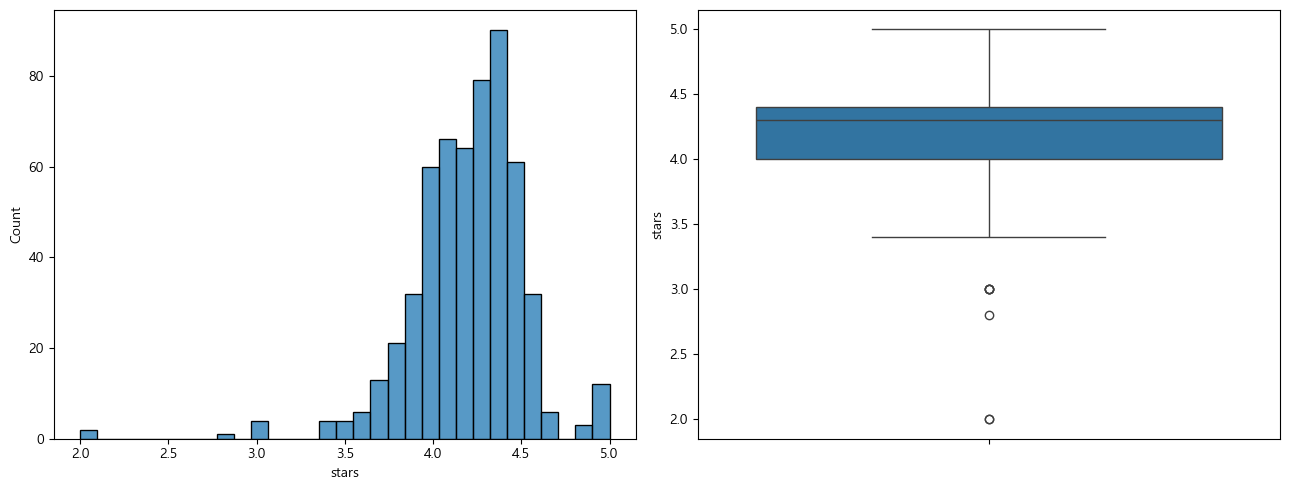

In [195]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.histplot(data=all_df['stars'])

plt.subplot(1,2,2)
ax=sns.boxplot(data=all_df['stars'])
plt.tight_layout()

<Axes: ylabel='reviews'>

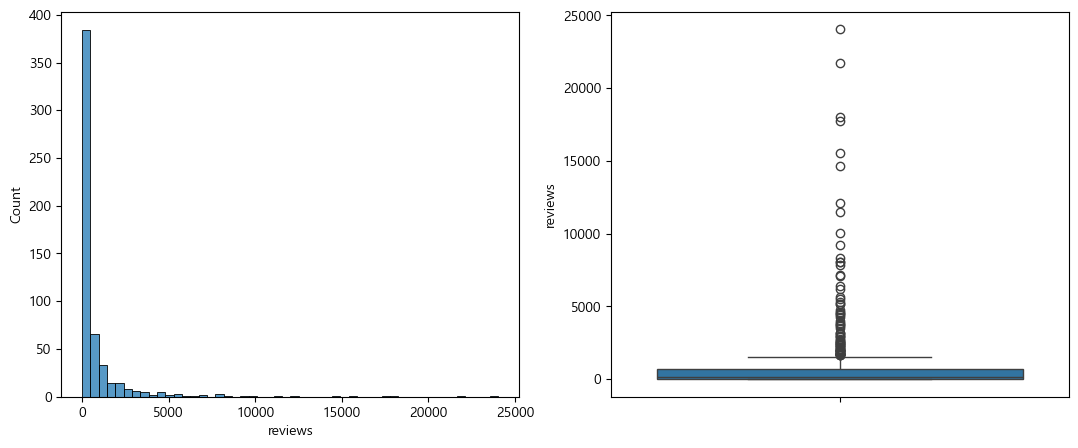

In [59]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(13,5))


plt.subplot(1,2,1)
sns.histplot(data=all_df['reviews'],bins=50)

plt.subplot(1,2,2)
sns.boxplot(data=all_df['reviews'])

# 값의 범위가 너무 커서 log1p를 먼저 적용
# 리뷰는 범위가 커서 outliers에 강한 robust scaler 적용

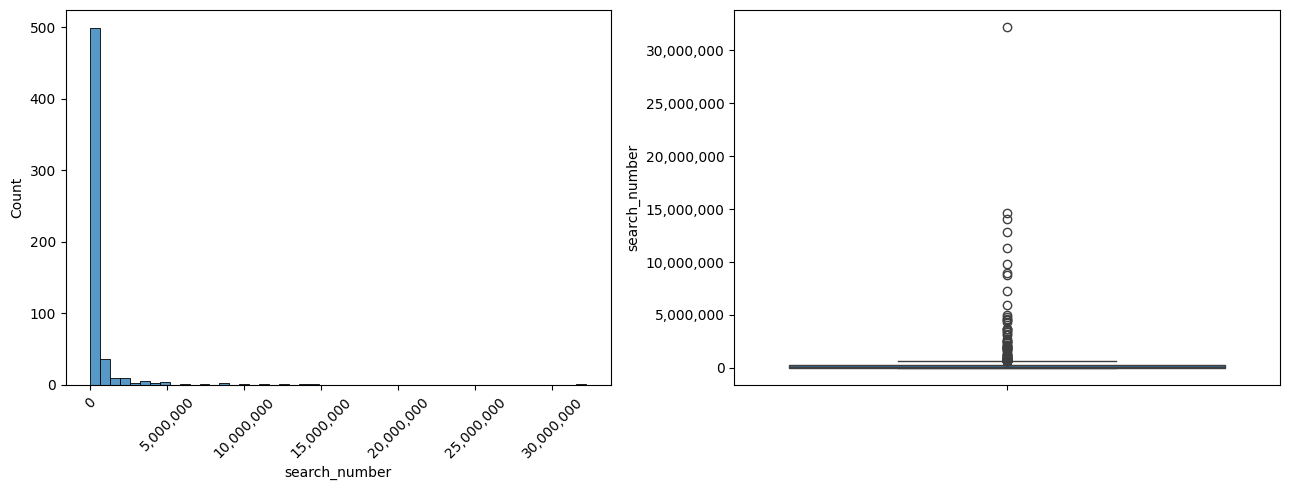

In [46]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.histplot(data=all_df['search_number'],bins=50)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=45)


plt.subplot(1,2,2)
ax=sns.boxplot(data=all_df['search_number'])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.tight_layout()

# 값의 범위가 너무 커 log1p 적용
# 검색수 역시 아웃라이어가 많아 robust scaler

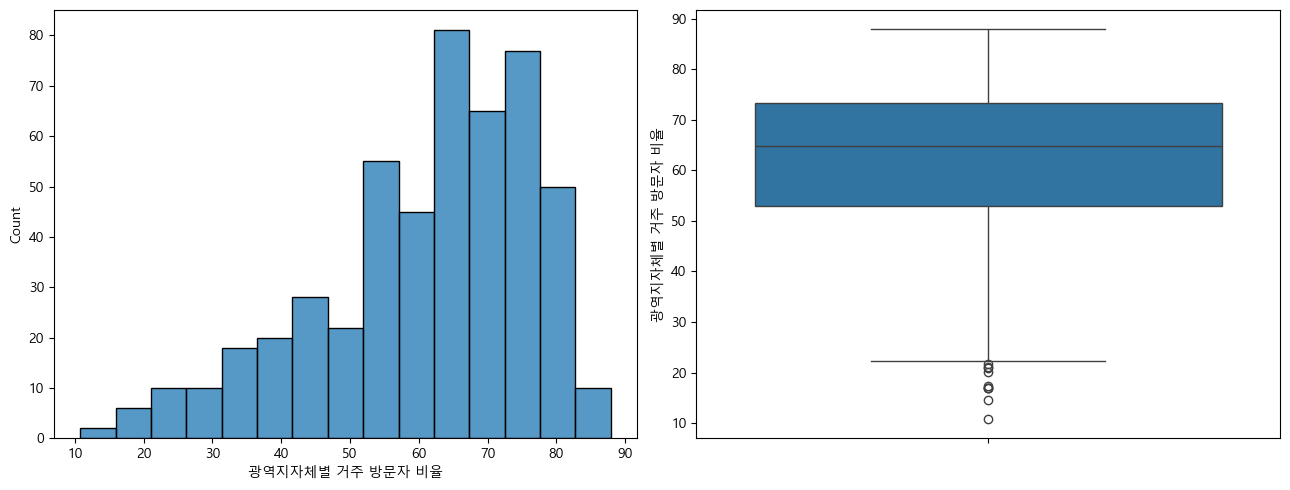

In [53]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.histplot(data=all_df['광역지자체별 거주 방문자 비율'])

plt.subplot(1,2,2)
ax=sns.boxplot(data=all_df['광역지자체별 거주 방문자 비율'])
plt.tight_layout()

# 백분율 값이기에 minmax scaler 적용

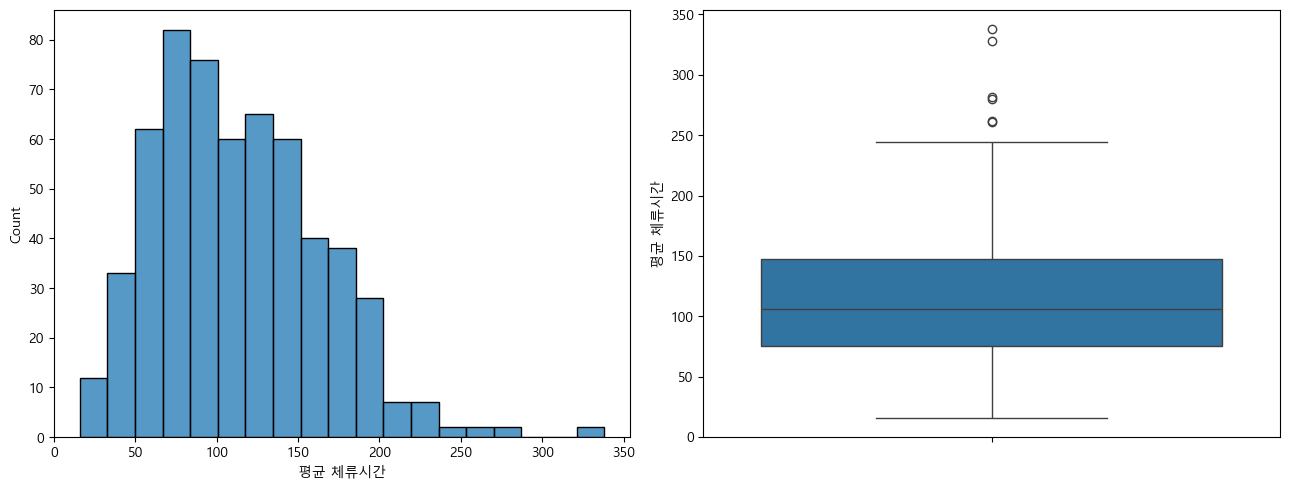

In [60]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.histplot(data=all_df['평균 체류시간'])

plt.subplot(1,2,2)
ax=sns.boxplot(data=all_df['평균 체류시간'])
plt.tight_layout()

# 비교적 아웃라이어가 적기에 standard scaler 적용

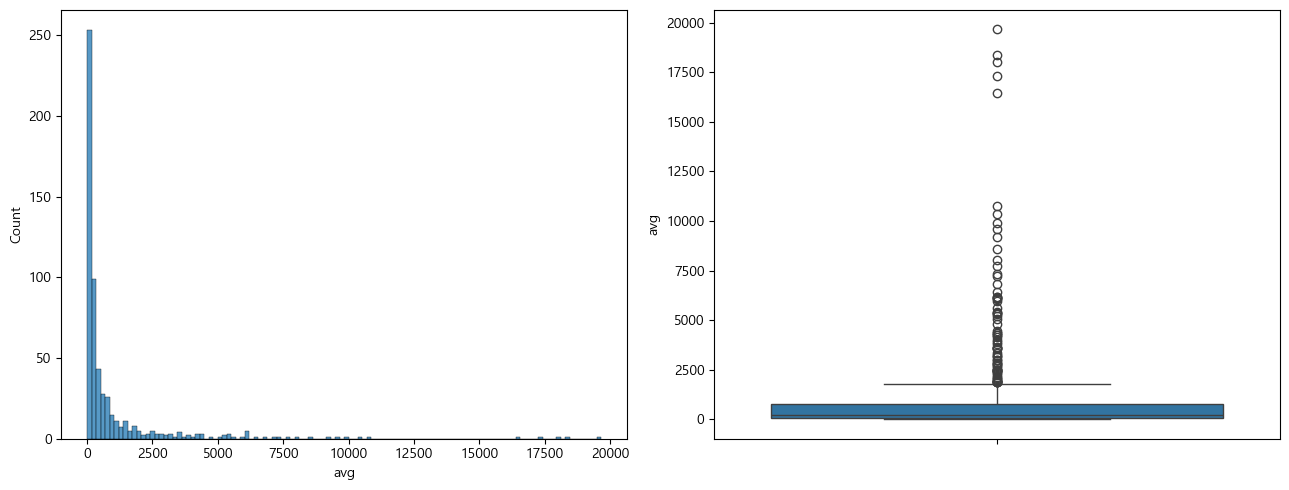

In [78]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.histplot(data=all_df['avg'])

plt.subplot(1,2,2)
ax=sns.boxplot(data=all_df['avg'])
plt.tight_layout()

# 값의 범위가 커 log1p 적용
# 편차 크기에 robust scaler 적용

In [20]:
test_df['reviews'] = all_df['reviews'].apply(lambda x: np.log1p(x))
test_df['search_number'] = all_df['search_number'].apply(lambda x: np.log1p(x))
test_df['avg'] = all_df['avg'].apply(lambda x: np.log1p(x))

In [21]:
test_df.describe()

,stars,reviews,search_number,avg
count,560.000000,560.000000,578.000000,578.000000
mean,4.215000,5.085036,11.156857,5.231049
std,0.333448,2.042585,1.981133,2.024443
min,2.000000,0.693147,5.347108,1.386294
25%,4.000000,3.657068,9.670973,3.805735
50%,4.300000,5.225732,11.096665,5.434630
75%,4.400000,6.509136,12.455861,6.638804
max,5.000000,10.087973,17.287477,9.886257


In [22]:
test_df['reviews'] = robust_scaler.fit_transform(test_df[['reviews']])
test_df['search_number'] = robust_scaler.fit_transform(test_df[['search_number']])
test_df['avg'] = robust_scaler.fit_transform(test_df[['avg']])

test_df['광역지자체별 거주 방문자 비율'] = minmax_scaler.fit_transform(all_df[['광역지자체별 거주 방문자 비율']])
test_df['평균 체류시간'] = standard_scaler.fit_transform(all_df[['평균 체류시간']])

In [23]:
test_df['stars'] = all_df['stars']

In [24]:
test_df[test_df['관광지명'].str.contains('만덕고개')][['관광지명','stars','reviews','avg','search_number','광역지자체별 거주 방문자 비율','평균 체류시간']]

,관광지명,stars,reviews,avg,search_number,광역지자체별 거주 방문자 비율,평균 체류시간
5,만덕고개누리길전망데크,4.4,0.021926,0.097739,-1.319797,0.949416,-1.507256


In [15]:
test_df.describe()

,first_scores,reviews,search_number,avg,광역지자체별 거주 방문자 비율,평균 체류시간,stars
count,578.000000,560.000000,5.780000e+02,578.000000,499.000000,5.780000e+02,560.000000
mean,16.710188,-0.049331,2.161374e-02,-0.071859,0.651664,-1.229313e-16,4.215000
std,3.832104,0.716177,7.113869e-01,0.714576,0.202557,1.000866e+00,0.333448
min,1.495376,-1.589227,-2.064556e+00,-1.428958,0.000000,-1.897724e+00,2.000000
25%,14.716144,-0.550009,-5.119387e-01,-0.574958,0.546044,-7.458421e-01,4.000000
50%,17.323726,0.000000,3.188639e-16,0.000000,0.701686,-1.406159e-01,4.300000
75%,19.299629,0.449991,4.880613e-01,0.425042,0.811284,6.744870e-01,4.400000
max,30.550058,1.704812,2.223003e+00,1.571309,1.000000,4.388818e+00,5.000000


In [27]:
score = []

for i,row in test_df.iterrows():
    if pd.isna(row['stars']):
        star = 0
    else:
        star = row['stars'] * 1.2
    if pd.isna(row['reviews']):
        review = 0
    else:
        review = (max(test_df['reviews']) - (row['reviews'])) * 1.1
    search = max(test_df['search_number']) - row['search_number']
    if pd.isna(row['광역지자체별 거주 방문자 비율']):
        visit = 0
    else:
        visit = row['광역지자체별 거주 방문자 비율'] * 1.1
    time = row['평균 체류시간'] * 0.5
    navi = max(test_df['avg']) - row['avg']
    all = star+review+search+visit+time+navi
    
    score.append(all)

test_df['scores'] = score

In [43]:
for i,row in test_df[test_df['관광지명'].str.contains('국제시장')].iterrows():
    if pd.isna(row['stars']):
        star = 0
    else:
        star = row['stars'] * 1.2
    if pd.isna(row['reviews']):
        review = 0
    else:
        review = (max(test_df['reviews']) - (row['reviews'])) * 1.1
    search = max(test_df['search_number']) - row['search_number']
    if pd.isna(row['광역지자체별 거주 방문자 비율']):
        visit = 0
    else:
        visit = row['광역지자체별 거주 방문자 비율'] * 1.1
    time = row['평균 체류시간'] * 0.5
    navi = max(test_df['avg']) - row['avg']
    
    print(star,review,search,visit,time,navi)

4.919999999999999 0.2648748544535634 0.28401321779602573 0.7219195849546044 -0.44125302407308303 0.26826513653421613


In [44]:
test_df[test_df['관광지명'].str.contains('국제시장')][['관광지명','stars','reviews','avg','search_number','광역지자체별 거주 방문자 비율','평균 체류시간','scores']]

,관광지명,stars,reviews,avg,search_number,광역지자체별 거주 방문자 비율,평균 체류시간,scores
227,국제시장,4.1,1.464017,1.303044,1.938989,0.656291,-0.882506,6.01782


In [50]:
a = pd.read_csv('./data/tourist_attractions.csv')
b = pd.read_csv('./data/southern_area_tourist_attractions.csv')
c = pd.read_csv('./data/all_df.csv')

In [53]:
print(f'전국 관광지 수     : {len(a)}')
print(f'남부권 관광지 수   : {len(b)}')
print(f'5개 지역 관광지 수 : {len(c)}')

전국 관광지 수     : 39786
남부권 관광지 수   : 4684
5개 지역 관광지 수 : 578


<Axes: ylabel='reviews'>

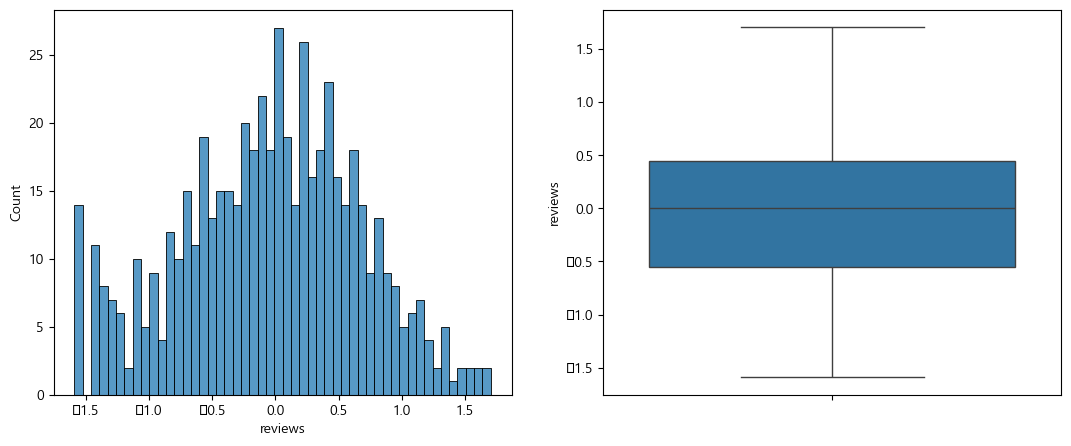

In [192]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.histplot(data=test_df['reviews'],bins=50)

plt.subplot(1,2,2)
sns.boxplot(data=test_df['reviews'])

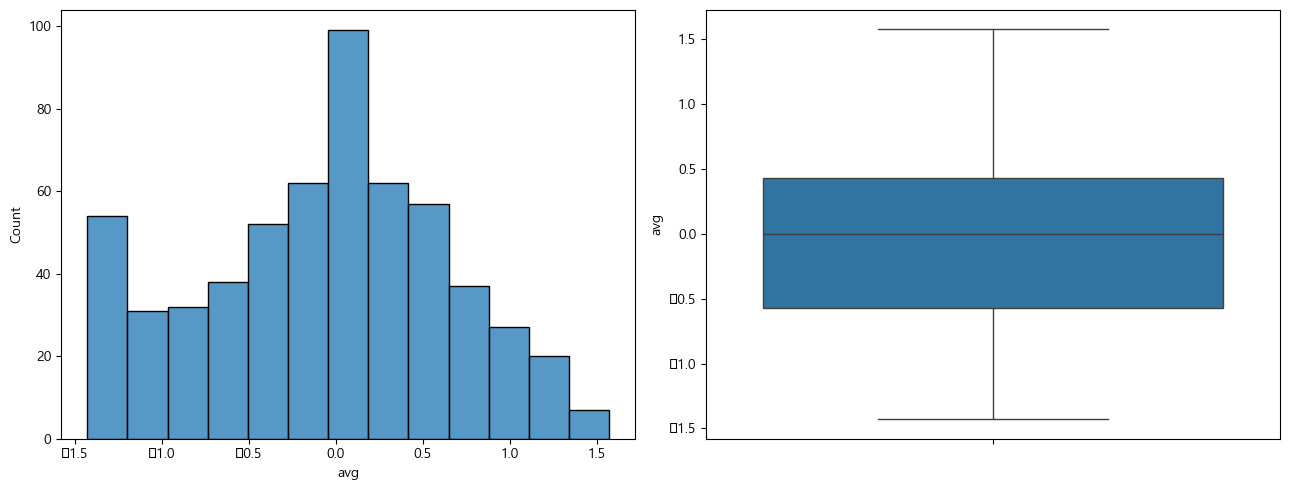

In [196]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.histplot(data=test_df['avg'])

plt.subplot(1,2,2)
ax=sns.boxplot(data=test_df['avg'])
plt.tight_layout()

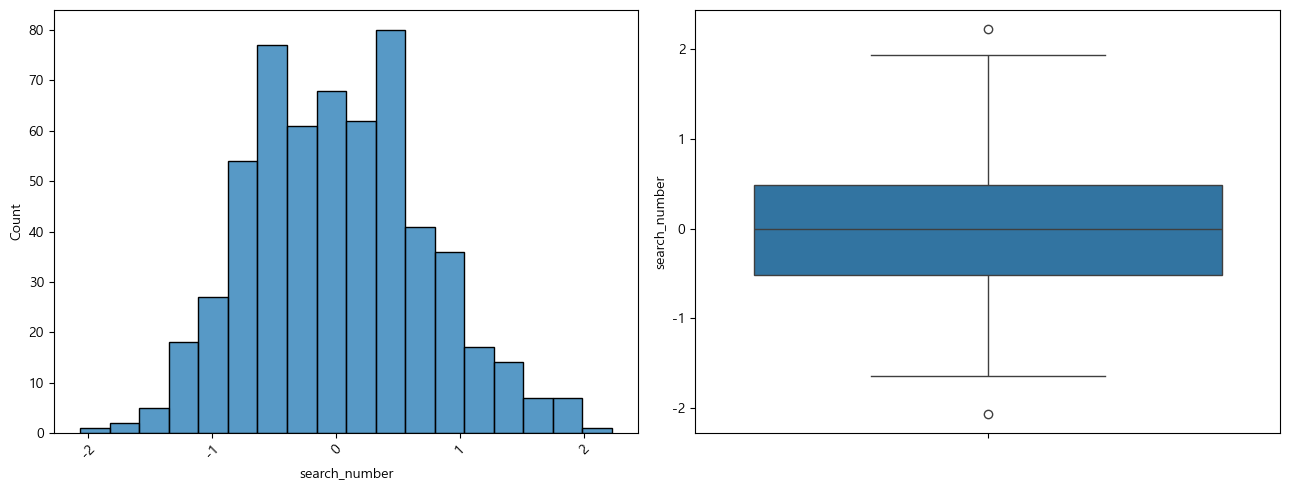

In [197]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
ax=sns.histplot(data=test_df['search_number'])
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.xticks(rotation=45)


plt.subplot(1,2,2)
ax=sns.boxplot(data=test_df['search_number'])
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.tight_layout()

In [29]:
b = test_df[:239]
u = test_df[239:345]
gy = test_df[345:446]
j = test_df[446:529]
gw = test_df[529:]

In [30]:
b_avg = b['scores'].sum() / len(b)
u_avg = u['scores'].sum() / len(u)
gy_avg = gy['scores'].sum() / len(gy)
j_avg = j['scores'].sum() / len(j)
gw_avg = gw['scores'].sum() / len(gw)

In [31]:
print('부산 : ',len(b[b['scores'] >= b_avg]) / len(b))
print('울산 : ',len(u[u['scores'] >= u_avg]) / len(u))
print('경남 : ',len(gy[gy['scores'] >= gy_avg]) / len(gy))
print('전남 : ',len(j[j['scores'] >= j_avg]) / len(j))
print('광주 : ',len(gw[gw['scores'] >= gw_avg]) / len(gw))

부산 :  0.5104602510460251
울산 :  0.4811320754716981
경남 :  0.5742574257425742
전남 :  0.5542168674698795
광주 :  0.42857142857142855


In [32]:
print('부산 : ',len(b[b['scores'] >= b_avg]))
print('울산 : ',len(u[u['scores'] >= u_avg]))
print('경남 : ',len(gy[gy['scores'] >= gy_avg]))
print('전남 : ',len(j[j['scores'] >= j_avg]))
print('광주 : ',len(gw[gw['scores'] >= gw_avg]))

부산 :  122
울산 :  51
경남 :  58
전남 :  46
광주 :  21


In [34]:
for i,row in b.iterrows():
    if row['scores'] >= b_avg:
        b.at[i,'구분'] = '숨은 명소'
    else:
        b.at[i,'구분'] = '일반 명소'
        
for i,row in u.iterrows():
    if row['scores'] >= b_avg:
        u.at[i,'구분'] = '숨은 명소'
    else:
        u.at[i,'구분'] = '일반 명소'
        
for i,row in gy.iterrows():
    if row['scores'] >= b_avg:
        gy.at[i,'구분'] = '숨은 명소'
    else:
        gy.at[i,'구분'] = '일반 명소'
        
for i,row in j.iterrows():
    if row['scores'] >= b_avg:
        j.at[i,'구분'] = '숨은 명소'
    else:
        j.at[i,'구분'] = '일반 명소'
        
for i,row in gw.iterrows():
    if row['scores'] >= b_avg:
        gw.at[i,'구분'] = '숨은 명소'
    else:
        gw.at[i,'구분'] = '일반 명소'

In [51]:
b[['관광지명','scores','구분']].sort_values(by='scores',ascending=False).head(20)

,관광지명,scores,구분
36,안적사,10.702556,숨은 명소
0,명지동근린공원,10.535436,숨은 명소
26,황령산,10.502164,숨은 명소
31,부산동명불원,10.340869,숨은 명소
4,부산복천동고분군,10.260520,숨은 명소
46,금강사,10.022599,숨은 명소
149,은진사,10.017730,숨은 명소
8,재한유엔기념공원,9.966896,숨은 명소
2,학리항,9.920880,숨은 명소
79,금정산,9.913288,숨은 명소


In [49]:
all_df[all_df['지역']=='부산'][['관광지명','scores','구분']].head(20)

,관광지명,scores,구분
0,명지동근린공원,24.909113,숨은 명소
1,칠암항,24.586122,숨은 명소
2,학리항,24.220685,숨은 명소
3,아미르공원,23.708141,숨은 명소
4,부산복천동고분군,23.631031,숨은 명소
5,만덕고개누리길전망데크,23.018103,숨은 명소
6,구덕민속예술관,22.625021,숨은 명소
7,부산충렬사,22.603909,숨은 명소
8,재한유엔기념공원,22.600597,숨은 명소
9,우장춘기념관,22.542731,숨은 명소


In [38]:
pd.concat([b,u,gy,j,gw])[['관광지명','scores','구분']]

,관광지명,scores,구분
0,명지동근린공원,10.535436,숨은 명소
1,칠암항,9.612265,숨은 명소
2,학리항,9.920880,숨은 명소
3,아미르공원,9.873103,숨은 명소
4,부산복천동고분군,10.260520,숨은 명소
...,...,...,...
573,푸른길분수공원,7.634345,일반 명소
574,오리요리의거리,6.740735,일반 명소
575,광주예술의거리,5.988137,일반 명소
576,도림사(광주),4.963981,일반 명소


## 부산 투어노선

In [154]:
busan = ['부산역', '우암동도시숲', '재한유엔기념공원', '삼익비치수변공원', '황령산', '연동시장', '한국기독교선교박물관', '만덕고개누리길전망데크', '우장춘기념관', '부산복천동고분군', '부산충렬사', '벡스코', '센텀APEC나루공원', '광안대교', '평화공원', '부산항대교', '부산역']

In [155]:
for i in busan:
    if i not in all_df['관광지명'].tolist():
        print(i)

부산역
광안대교
부산항대교
부산역


In [163]:
a = all_df[all_df['관광지명'].isin(busan)].reset_index(drop=True)

In [175]:
a.loc[13,'관광지명'] = '부산역'
a.loc[13,'latitude'] = 35.114495
a.loc[13,'longitude'] = 129.03933

a.loc[14,'관광지명'] = '광안대교'
a.loc[14,'latitude'] = 35.147551
a.loc[14,'longitude'] = 129.1302088

a.loc[15,'관광지명'] = '부산항대교'
a.loc[15,'latitude'] = 35.1037587
a.loc[15,'longitude'] = 129.0630537

In [185]:
for i,name in enumerate(busan[:-1]):
    for j in range(len(a)):
        if a.iloc[j]['관광지명'] == name:
            a.loc[j,'new_index'] = i
            break

In [223]:
a = a.set_index('new_index').sort_values(by='new_index')

In [240]:
a.to_csv('./pages/data/busan_tour.csv',index=False,encoding='utf-8')

## 울산 투어노선

In [270]:
ulsan = ['울산역', '두현저수지', '회야댐생태공원', '장생포고래박물관', '대송농수산물시장', '방어진항', '주전봉수대', '주전몽돌해변', '어물동마애여래좌상', '약사동제방유적전시관', '함월루', '구강서원', '울산큰애기집/이팔청춘사진관', '고복수음악관', '태화강동굴피아', '울산역']

In [271]:
for i in ulsan:
    if i not in all_df['관광지명'].tolist():
        print(i)

울산역
울산역


In [272]:
b = all_df[all_df['관광지명'].isin(ulsan)].reset_index(drop=True)

In [273]:
b.loc[14,'관광지명'] = '울산역'
b.loc[14,'latitude'] = 35.5513565
b.loc[14,'longitude'] = 129.1389365

In [288]:
for i,name in enumerate(ulsan[:-1]):
    for j in range(len(b)):
        if b.iloc[j]['관광지명'] == name:
            b.loc[j,'new_index'] = i
            break

In [290]:
b = b.set_index('new_index').sort_values(by='new_index')

In [292]:
b.to_csv('./pages/data/ulsan_tour.csv',index=False,encoding='utf-8')

## 경남 투어노선

In [356]:
gyeongnam = ['창원역', '사화공원', '명서전통시장', '창원봉곡시장', '창원역사민속관', '창원성산패총', '안민고개', '창원편백치유의숲', '장복산조각공원', '가포수변공원', '월영대', '부림시장먹자골목', '오동동통술거리', '산호공원', '창원역']

In [357]:
for i in gyeongnam:
    if i not in all_df['관광지명'].tolist():
        print(i)

창원역
창원역


In [358]:
c = all_df[all_df['관광지명'].isin(gyeongnam)].reset_index(drop=True)

In [359]:
c.loc[13,'관광지명'] = '창원역'
c.loc[13,'latitude'] = 35.2574358
c.loc[13,'longitude'] = 128.6066796

In [360]:
for i,name in enumerate(gyeongnam[:-1]):
    for j in range(len(c)):
        if c.iloc[j]['관광지명'] == name:
            c.loc[j,'new_index'] = i
            break

In [361]:
c = c.set_index('new_index').sort_values(by='new_index')

In [336]:
c.to_csv('./pages/data/gyeongnam_tour.csv',index=False,encoding='utf-8')

## 전남 투어노선

In [371]:
jeonnam = ['여수EXPO역', '만성리검은모래해변', '여수녹테마레', '미평산림욕장', '여수충민사', '여수타루비', '국동항', '돌산도', '은적사(여수)', '돌산항', '봉황산자연휴양림(여수봉황산자연휴양림)', '두문포(죽포항)', '전라남도해양수산과학관', '여수EXPO역']

In [372]:
for i in jeonnam:
    if i not in all_df['관광지명'].tolist():
        print(i)

여수EXPO역
여수EXPO역


In [373]:
d = all_df[all_df['관광지명'].isin(jeonnam)].reset_index(drop=True)

In [375]:
d.loc[12,'관광지명'] = '여수EXPO역'
d.loc[12,'latitude'] = 34.753187
d.loc[12,'longitude'] = 127.748971

In [376]:
for i,name in enumerate(jeonnam[:-1]):
    for j in range(len(d)):
        if d.iloc[j]['관광지명'] == name:
            d.loc[j,'new_index'] = i
            break

In [377]:
d = d.set_index('new_index').sort_values(by='new_index')

In [379]:
d.to_csv('./pages/data/jeonnam_tour.csv',index=False,encoding='utf-8')

## 광주 투어노선

In [391]:
gwangju = ['광주역', '원각사(광주)', '5·18민주화운동기록관', '전일빌딩245', '국립아시아문화전당', '남광주시장', '사직공원전망타워', '광주양동시장', '하정웅미술관(광주)', '운천저수지', '김대중컨벤션센터', '1913송정역시장', '무각사', '5·18기념공원', '중외공원', '광주비엔날레전시관', '광주역']

In [392]:
for i in gwangju:
    if i not in all_df['관광지명'].tolist():
        print(i)

광주역
광주역


In [393]:
e = all_df[all_df['관광지명'].isin(gwangju)].reset_index(drop=True)

In [394]:
e.loc[15,'관광지명'] = '광주역'
e.loc[15,'latitude'] = 35.1653428
e.loc[15,'longitude'] = 126.9092003

In [398]:
for i,name in enumerate(gwangju[:-1]):
    for j in range(len(e)):
        if e.iloc[j]['관광지명'] == name:
            e.loc[j,'new_index'] = i
            break

In [400]:
e = e.set_index('new_index').sort_values(by='new_index')

In [402]:
e.to_csv('./pages/data/gwangju_tour.csv',index=False,encoding='utf-8')

In [234]:
ab = []
for i,row in a.iterrows():
    ab.append([row['latitude'],row['longitude']])
ab.append(ab[0])

In [235]:
import folium

busan_map = folium.Map(location=[35.115225,129.042243],zoom_start=11)

In [238]:
for i in range(len(a)):
    folium.Marker(
            [a.iloc[i]['latitude'],a.iloc[i]['longitude']],
            popup=folium.Popup(a.iloc[i]['관광지명'],maxWidth=300),
            fill_opacity=0.5,
            icon=folium.Icon(color='blue')            
            ).add_to(busan_map)

In [236]:
folium.PolyLine(locations=ab,tooltip='Polyline').add_to(busan_map)

In [ ]:
busan_map

In [245]:
a.to_dict()

{'관광지명': {0: '부산역',
  1: '우암동도시숲',
  2: '재한유엔기념공원',
  3: '삼익비치수변공원',
  4: '황령산',
  5: '연동시장',
  6: '한국기독교선교박물관',
  7: '만덕고개누리길전망데크',
  8: '우장춘기념관',
  9: '부산복천동고분군',
  10: '부산충렬사',
  11: '벡스코',
  12: '센텀APEC나루공원',
  13: '광안대교',
  14: '평화공원',
  15: '부산항대교'},
 '평균 체류시간': {0: nan,
  1: 123.0,
  2: 128.0,
  3: 33.0,
  4: 121.0,
  5: 133.0,
  6: 73.0,
  7: 36.0,
  8: 49.0,
  9: 183.0,
  10: 114.0,
  11: 97.0,
  12: 55.0,
  13: nan,
  14: 98.0,
  15: nan},
 'stars': {0: nan,
  1: 4.4,
  2: 4.7,
  3: 5.0,
  4: 5.0,
  5: 4.2,
  6: 5.0,
  7: 4.4,
  8: 4.1,
  9: 4.0,
  10: 4.4,
  11: 4.3,
  12: 4.5,
  13: nan,
  14: 4.5,
  15: nan},
 'reviews': {0: nan,
  1: 306.0,
  2: 193.0,
  3: 3.0,
  4: 5.0,
  5: 5.0,
  6: 1.0,
  7: 197.0,
  8: 59.0,
  9: 1.0,
  10: 52.0,
  11: 8364.0,
  12: 1121.0,
  13: nan,
  14: 1238.0,
  15: nan},
 '광역지자체별 거주 방문자 비율': {0: nan,
  1: 67.5,
  2: 69.3,
  3: 43.0,
  4: 72.4,
  5: 78.5,
  6: 78.8,
  7: 84.0,
  8: 60.3,
  9: 74.3,
  10: 80.9,
  11: 61.0,
  12: 60.2,
  13: nan,

In [3]:
busan = pd.read_csv('./busan.csv')
ulsan = pd.read_csv('./ulsan.csv')
gyeongnam = pd.read_csv('./gyeongnam.csv')
jeonnam = pd.read_csv('./jeonnam.csv')
gwangju = pd.read_csv('./gwangju.csv')

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='scores', ylabel='Count'>

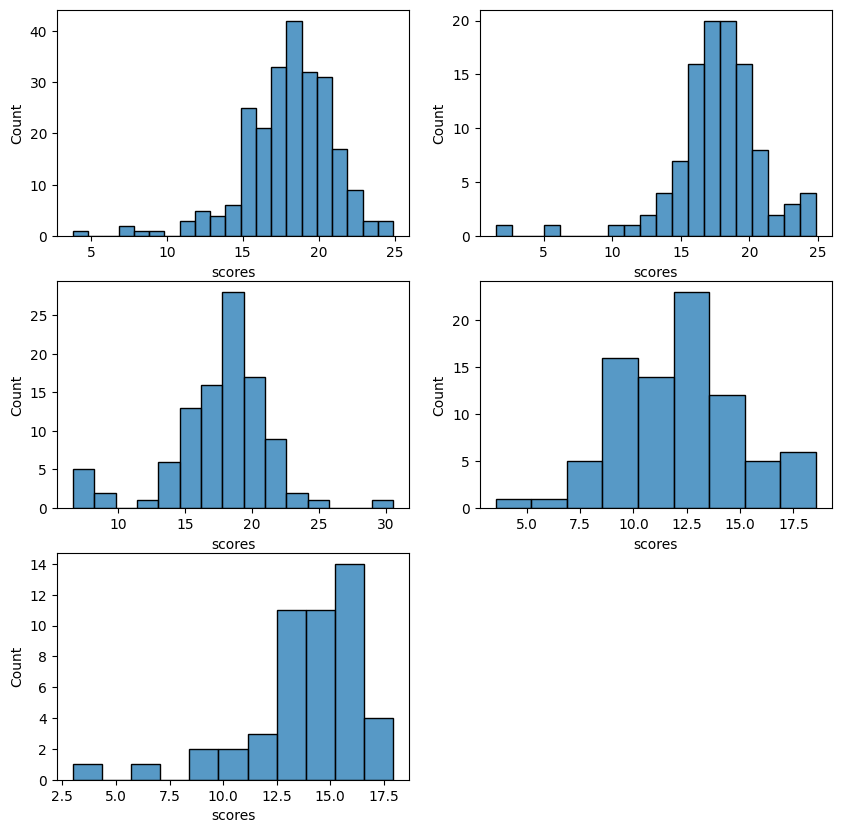

In [55]:
# 점수 분포 파악
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(busan['scores'])

plt.subplot(3,2,2)
sns.histplot(ulsan['scores'])

plt.subplot(3,2,3)
sns.histplot(gyeongnam['scores'])

plt.subplot(3,2,4)
sns.histplot(jeonnam['scores'])

plt.subplot(3,2,5)
sns.histplot(gwangju['scores'])

In [56]:
# 점수 평균 파악
busan_avg = busan['scores'].sum() / len(busan)
ulsan_avg = ulsan['scores'].sum() / len(ulsan)
gyeongnam_avg = gyeongnam['scores'].sum() / len(gyeongnam)
jeonnam_avg = jeonnam['scores'].sum() / len(jeonnam)
gwangju_avg = gwangju['scores'].sum() / len(gwangju)

In [59]:
# 관광지 비율 파악
print('부산 : ',len(busan[busan['scores'] >= busan_avg]) / len(busan))
print('울산 : ',len(ulsan[ulsan['scores'] >= ulsan_avg]) / len(ulsan))
print('경남 : ',len(gyeongnam[gyeongnam['scores'] >= gyeongnam_avg]) / len(gyeongnam))
print('전남 : ',len(jeonnam[jeonnam['scores'] >= jeonnam_avg]) / len(jeonnam))
print('광주 : ',len(gwangju[gwangju['scores'] >= gwangju_avg]) / len(gwangju))

부산 :  0.5481171548117155
울산 :  0.5283018867924528
경남 :  0.5841584158415841
전남 :  0.5180722891566265
광주 :  0.5918367346938775


In [61]:
# 관광지 수 파악
print('부산 : ',len(busan[busan['scores'] >= busan_avg]))
print('울산 : ',len(ulsan[ulsan['scores'] >= ulsan_avg]))
print('경남 : ',len(gyeongnam[gyeongnam['scores'] >= gyeongnam_avg]))
print('전남 : ',len(jeonnam[jeonnam['scores'] >= jeonnam_avg]))
print('광주 : ',len(gwangju[gwangju['scores'] >= gwangju_avg]))

부산 :  131
울산 :  56
경남 :  59
전남 :  43
광주 :  29
